# ShapeNet Dataset

[A Scalable Active Framework for Region Annotation in 3D Shape Collections](http://web.stanford.edu/~ericyi/papers/part_annotation_16_small.pdf)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch_geometric as tg
from IPython.display import Video, display
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme()

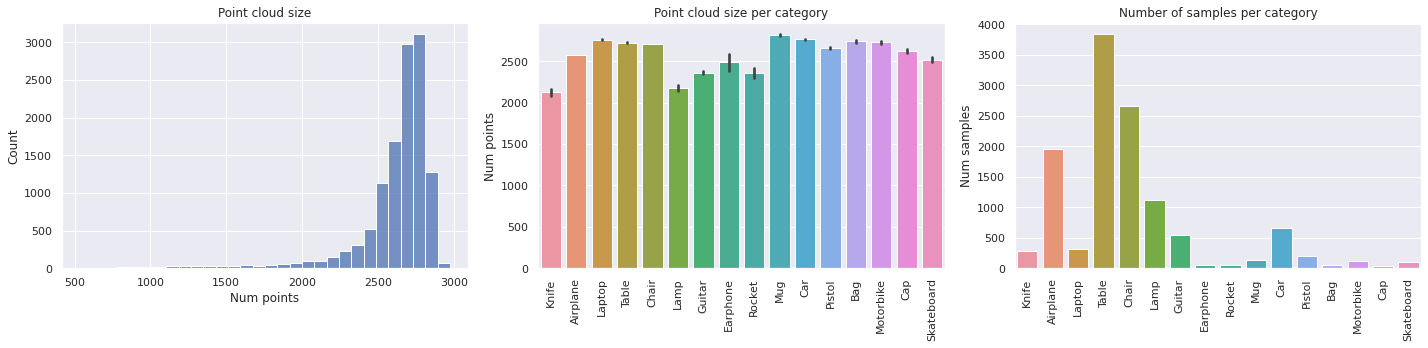

In [2]:
categories = list(tg.datasets.ShapeNet.category_ids.keys())
seg_classes_colors = torch.tensor(
    [
        mpl.cm.tab10(i)
        for name, classes in tg.datasets.ShapeNet.seg_classes.items()
        for i, c in enumerate(classes)
    ]
)

ds_train = tg.datasets.ShapeNet(root="../../data", split="train")
df_train = pd.DataFrame(
    [(categories[g.category.item()], g.num_nodes) for g in ds_train],
    columns=["category", "num_nodes"],
)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

ax = axes[0]
sns.histplot(data=df_train, x="num_nodes", bins=30, ax=ax)
ax.set(xlabel="Num points", title="Point cloud size")

ax = axes[1]
sns.barplot(data=df_train, x="category", y="num_nodes", ax=ax)
ax.set(title="Point cloud size per category", xlabel=None, ylabel="Num points")
for t in ax.get_xticklabels():
    t.set_rotation(90)

ax = axes[2]
sns.countplot(data=df_train, x="category", ax=ax)
ax.set(title="Number of samples per category", xlabel=None, ylabel="Num samples")
for t in ax.get_xticklabels():
    t.set_rotation(90)

fig.tight_layout()
display(fig)
fig.savefig("shapenet-stats.svg")
plt.close(fig)
del df_train

In [3]:
def scatter3d(g):
    label = categories[g.category.item()]
    x, z, y = g.pos.T

    ax.text2D(
        0.5,
        0.97,
        s=label,
        horizontalalignment="center",
        verticalalignment="top",
        transform=ax.transAxes,
    )
    ax.scatter3D(x, y, z, marker=".", c=seg_classes_colors[g.y])

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    lim = (g.pos.max(dim=0).values - g.pos.min(dim=0).values).max().item() / 2
    ax.set_xlim3d(-lim, +lim)
    ax.set_ylim3d(-lim, +lim)
    ax.set_zlim3d(-lim, +lim)


def rotate(azim):
    ax.view_init(30, azim)
    return ax.artists


g = ds_train[1]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
scatter3d(g)

rotate(20)
fig.savefig(f"./shapenet-{categories[g.category]}.svg")

anim = mpl.animation.FuncAnimation(
    fig,
    rotate,
    frames=list(range(0, 30)) + list(range(30, 0, -1)),
    interval=120,
    blit=True,
)
anim.save(f"./shapenet-{categories[g.category]}.mp4")
plt.close(fig)

Video(f"./shapenet-{categories[g.category]}.mp4", html_attributes="autoplay loop")